# **<center>Housing Category Classificasion Model</center>**

In [223]:
import numpy as np
import pandas as pd

***loading the dataset (Part 2)***

In [224]:
data = pd.read_csv(r"dubai_properties.csv")

In [225]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

## ***Part 3 : Data Cleaning and Preprocessing***

### ***Cleaning the null and duplicates***

In [226]:
print(data.isna().sum())

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64


***Removing null values***

In [227]:
data.dropna(inplace=True)
print(data.isna().sum())

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64


***Cheking duplicated values***

In [228]:
print(data.duplicated().sum())

0


### ***Encoding***

In [229]:
obj_columns = data.select_dtypes(include=["object"]).columns
for col in obj_columns:
    uniques = data[col].unique()
    print(col, uniques)

Address ['The Gate Tower 2, The Gate Tower, Shams Gate District, Shams Abu Dhabi, Al Reem Island, Abu Dhabi'
 "Water's Edge, Yas Island, Abu Dhabi"
 'Al Raha Lofts, Al Raha Beach, Abu Dhabi' ...
 'Umm Al Quwain Marina, Umm Al Quwain'
 'Al Humrah B, Al Humrah, Umm Al Quwain'
 'Al Huboob 1, Al Salamah, Umm Al Quwain']
Type ['Apartment' 'Penthouse' 'Villa' 'Townhouse' 'Villa Compound'
 'Residential Building' 'Residential Floor' 'Hotel Apartment' ' Apartment'
 'Residential Plot']
Rent_category ['Medium' 'High' 'Low' ' Medium']
Frequency ['Yearly' ' Yearly']
Furnishing ['Unfurnished' 'Furnished' ' Furnished']
Purpose ['For Rent' ' For Rent']
Posted_date ['2024-03-07' '2024-03-08' '2024-03-21' '2024-02-24' '2024-02-16'
 '2023-12-12' '2024-03-11' '2024-02-22' '2024-04-05' '2023-01-29'
 '2024-03-25' '2024-03-22' '2024-04-02' '2024-03-18' '2024-03-14'
 '2023-12-01' '2024-02-27' '2024-03-29' '2024-02-28' '2024-03-30'
 '2024-02-15' '2024-02-13' '2024-04-06' '2024-01-15' '2024-02-06'
 '2023-12-18'

In [230]:
columns_to_label_encoding = ["Rent_category", "Frequency", "Furnishing", "Purpose"]



columns_to_categorical_encoding = ["Address", "Type", "Location", "City"]

***Label Encoding***

In [231]:
from sklearn.preprocessing import LabelEncoder

In [232]:
label_encoder = LabelEncoder()
for col in columns_to_label_encoding:
    data[col] = label_encoder.fit_transform(data[col])

In [233]:
for col in columns_to_label_encoding:
    print(col, data[col].unique())

Rent_category [3 1 2 0]
Frequency [1 0]
Furnishing [2 1 0]
Purpose [1 0]


***Date Encoding*** *using (ordinal encoder)*

In [234]:
data["Posted_date"] = pd.to_datetime(
    data["Posted_date"], format="%Y-%m-%d", errors="coerce"
).dt.day_of_year

In [235]:
data["Posted_date"]

0         67.0
1         68.0
2         81.0
3         55.0
4         47.0
         ...  
73729    343.0
73734    335.0
73735     86.0
73737    348.0
73738    348.0
Name: Posted_date, Length: 73023, dtype: float64

***Categorical Ecoding*** *(Target encoder)*

In [236]:
# type this command in terminal: pip install category_encoders
import category_encoders as ce

In [237]:
encoder = ce.TargetEncoder(cols=columns_to_categorical_encoding)
data_encoded = encoder.fit_transform(
    data[columns_to_categorical_encoding], data["Rent_category"]
)

data = pd.concat(
    [data.drop(columns=columns_to_categorical_encoding), data_encoded], axis=1
)

In [238]:
data[columns_to_categorical_encoding]

,Address,Type,Location,City
0,2.657878,2.124840,2.542257,2.129017
1,2.492669,2.124840,1.676570,2.129017
2,2.509815,2.124840,2.183177,2.129017
3,2.233018,1.345865,2.542257,2.129017
4,1.026812,1.664384,1.676570,2.129017
...,...,...,...,...
73729,2.064089,2.124840,2.061570,2.026545
73734,2.058332,1.664384,2.036955,2.026545
73735,2.006843,2.124840,2.048729,2.026545
73737,2.007040,2.124840,2.061570,2.026545


### ***Handling Outilers***

In [239]:
import seaborn as sns

***Handling outliers in 1st column***

In [240]:
print(data.columns[0])

Rent


<Axes: >

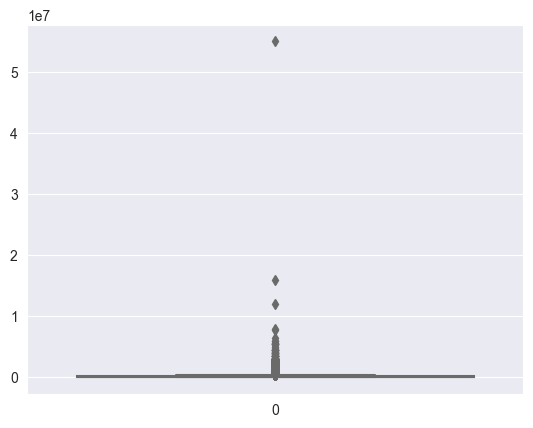

In [241]:
sns.set_style("darkgrid")
sns.boxplot(data=data["Rent"])

In [242]:
num_rent_outiers = (data["Rent"] > 0.5e7).sum()
print(num_rent_outiers)

15


In [243]:
rent_mean = data["Rent"].mean()
print(rent_mean)

148372.3144625666


In [244]:
data["Rent"].loc[data["Rent"] > 0.5e7] = rent_mean

C:\Users\Dell\AppData\Local\Temp\ipykernel_8924\341940449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Rent"].loc[data["Rent"] > 0.5e7] = rent_mean


In [245]:
# check outliers again
num_rent_outiers = (data["Rent"] > 0.5e7).sum()
print(num_rent_outiers)

0


***Handling outliers in 2nd column***

In [246]:
print(data.columns[1])

Beds


<Axes: >

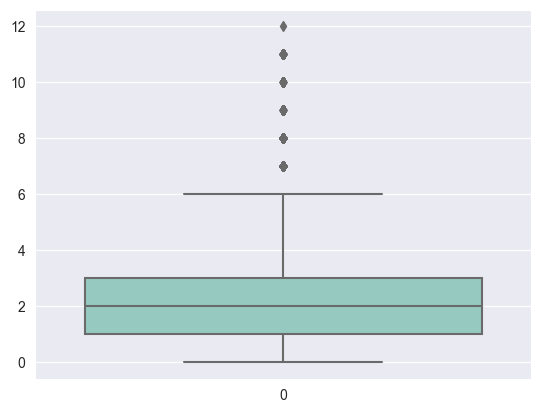

In [247]:
sns.boxplot(data=data["Beds"])

In [248]:
print(data["Beds"].min(), data["Beds"].max())

0 12


***Handling outliers in 3rd column***

In [249]:
print(data.columns[2])

Baths


<Axes: >

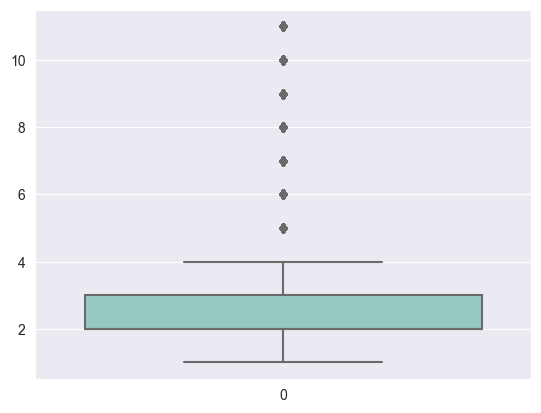

In [250]:
sns.boxplot(data=data["Baths"])

In [251]:
num_baths_outiers = (data["Baths"] > 10).sum()
print(num_baths_outiers)

201


In [252]:
print((data["Baths"]).max())

11


***Handling outliers in 4th column***

In [253]:
print(data.columns[3])

Area_in_sqft


<Axes: >

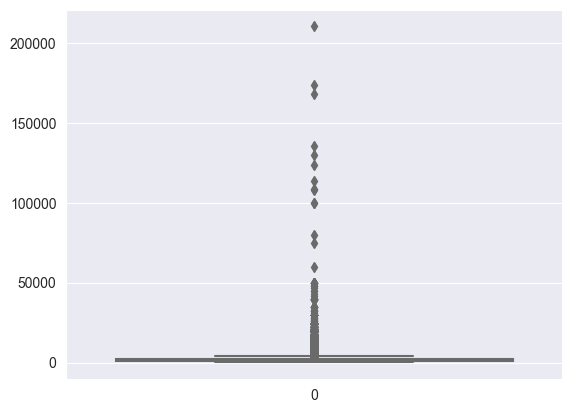

In [254]:
sns.boxplot(data=data["Area_in_sqft"])

In [255]:
area_mean = (data["Area_in_sqft"]).mean()
print(area_mean)

2035.6344713309504


In [256]:
num_area_outiers = (data["Area_in_sqft"] > 10000).sum()
print(num_area_outiers)

1171


In [257]:
(data["Area_in_sqft"]).max()

210254

In [258]:
data["Area_in_sqft"].loc[data["Area_in_sqft"] > 10000] = 10000

C:\Users\Dell\AppData\Local\Temp\ipykernel_8924\1008635694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Area_in_sqft"].loc[data["Area_in_sqft"] > 10000] = 10000


In [259]:
# check outliers again
num_outiers = (data["Area_in_sqft"] > 10000).sum()
print(num_outiers)

0


***Handling outliers in 5th column***

In [260]:
print(data.columns[4])

Rent_per_sqft


<Axes: >

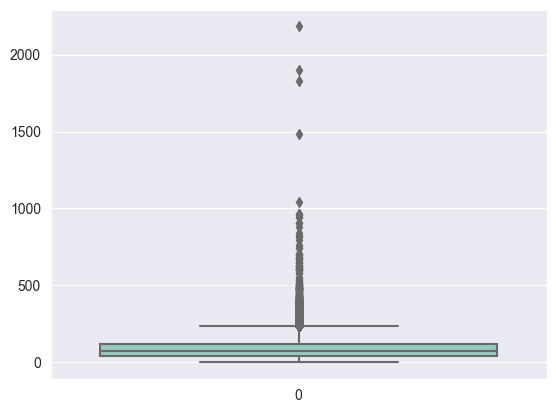

In [261]:
sns.boxplot(data=data["Rent_per_sqft"])

In [262]:
num_rent_sqft_outliears = (data["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

1154


In [263]:
data["Rent_per_sqft"].loc[data["Rent_per_sqft"] > 280] = 280

C:\Users\Dell\AppData\Local\Temp\ipykernel_8924\84417510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Rent_per_sqft"].loc[data["Rent_per_sqft"] > 280] = 280


In [264]:
# check num outliers again
num_rent_sqft_outliears = (data["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

0


***Handling outliers in 6th column***

In [265]:
print(data.columns[5])

Rent_category


<Axes: >

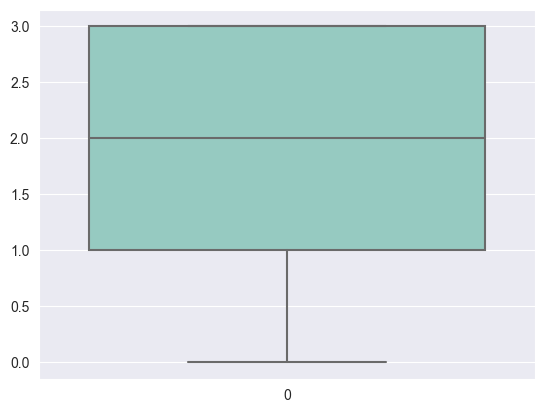

In [266]:
sns.boxplot(data=data["Rent_category"])

***Handling outliers in 7th column***

In [267]:
print(data.columns[6])

Frequency


<Axes: >

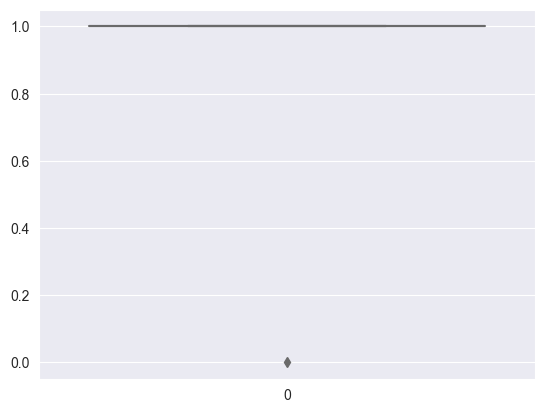

In [268]:
sns.boxplot(data=data["Frequency"])

In [269]:
print(
    data["Frequency"].max(),
    data["Frequency"].min(),
)

1 0


***Handling outliers in 8th column***

In [270]:
print(data.columns[7])

Furnishing


<Axes: >

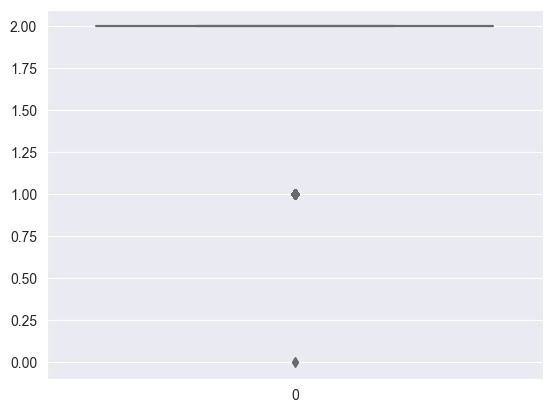

In [271]:
sns.boxplot(data=data["Furnishing"])

***Handling outliers in 9th column***

In [272]:
print(data.columns[8])

Purpose


<Axes: >

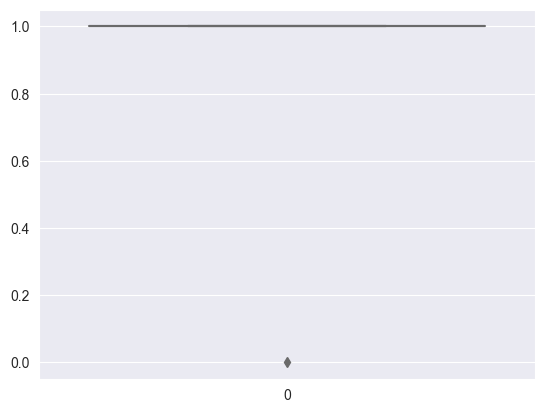

In [273]:
sns.boxplot(data=data["Purpose"])

***Handling outliers in 10th column***

In [274]:
print(data.columns[9])

Posted_date


<Axes: >

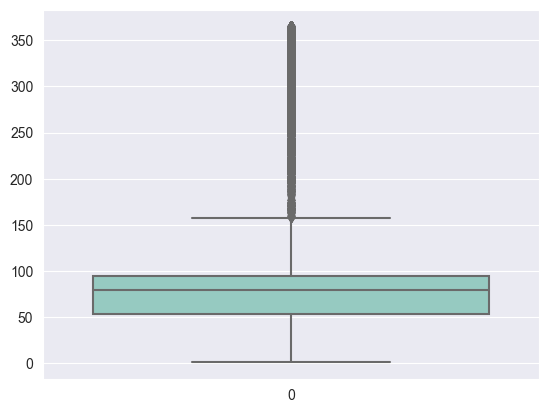

In [275]:
sns.boxplot(data=data["Posted_date"])

In [276]:
print(data["Posted_date"].min(), data["Posted_date"].max())
num_date_outlin = (data["Posted_date"] > 300).sum()
print(num_date_outlin)

1.0 365.0
8689


In [277]:
date_mean = data["Posted_date"].mean()
print(date_mean)

110.61815617211252


In [278]:
data["Posted_date"].loc[data["Posted_date"] > 300] = date_mean

C:\Users\Dell\AppData\Local\Temp\ipykernel_8924\932951741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Posted_date"].loc[data["Posted_date"] > 300] = date_mean


In [279]:
print((data["Posted_date"] > 300).sum())

0


***Handling outliers in 11th column***

In [280]:
print(data.columns[10])

Age_of_listing_in_days


<Axes: >

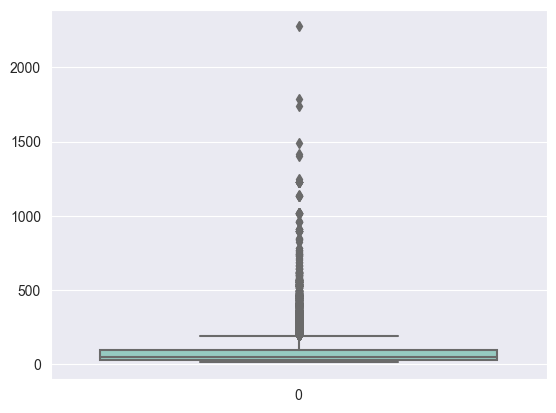

In [281]:
sns.boxplot(data=data["Age_of_listing_in_days"])

In [282]:
print(data["Age_of_listing_in_days"].min(),
      data["Age_of_listing_in_days"].max())
num_age_outlier = (data["Age_of_listing_in_days"] > 200).sum()
print(num_age_outlier)

11 2276
3314


In [283]:
age_mean = data["Age_of_listing_in_days"].mean()
print(age_mean)

73.8847349465237


In [284]:
data["Age_of_listing_in_days"].loc[data["Age_of_listing_in_days"] > 200] = 200

C:\Users\Dell\AppData\Local\Temp\ipykernel_8924\2034864674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age_of_listing_in_days"].loc[data["Age_of_listing_in_days"] > 200] = 200


In [285]:
print((data["Age_of_listing_in_days"] > 200).sum())

0


***Handling outliers in 12th column***

In [286]:
print(data.columns[11])

Latitude


<Axes: >

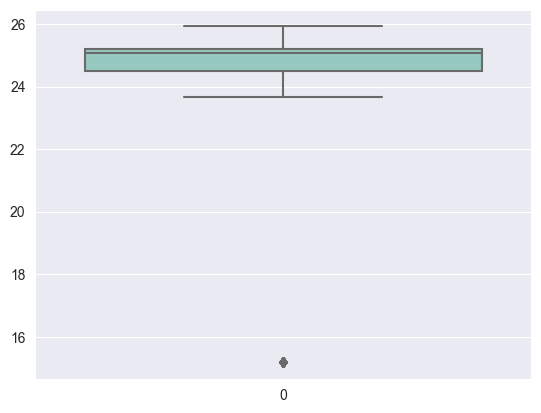

In [287]:
sns.boxplot(data=data["Latitude"])

In [288]:
print(data["Latitude"].min(), data["Latitude"].max())

15.175847 25.9203098


***Handling outliers in 13th column***

In [289]:
print(data.columns[12])

Longitude


<Axes: >

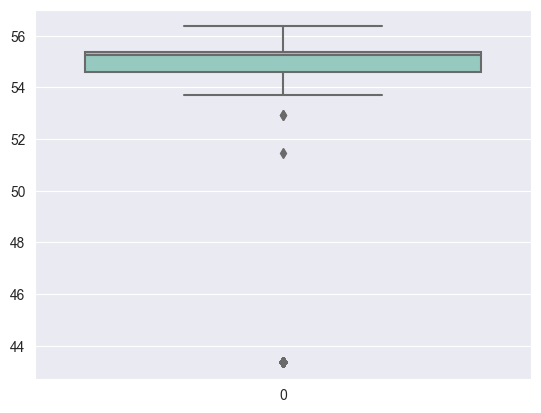

In [290]:
sns.boxplot(data=data["Longitude"])

In [291]:
print(data["Longitude"].min(), data["Longitude"].max())

43.351928 56.36129352186721


***Handling outliers in 14th column***

In [292]:
print(data.columns[13])

Address


<Axes: >

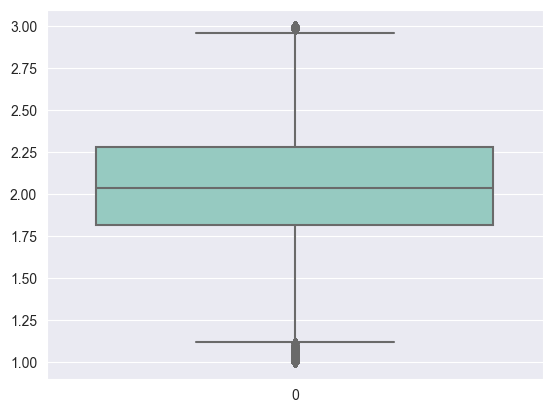

In [293]:
sns.boxplot(data=data["Address"])

In [294]:
address_mean = data["Address"].mean()
print(address_mean)

2.006548904584799


In [295]:
num_outiers = (data["Address"] > 2.5).sum() + (data["Address"] < 1.7).sum()
print(num_outiers)

24210


*replace outliers with mean*

In [296]:
data["Address"].loc[data["Address"] > 2.5] = address_mean
data["Address"].loc[data["Address"] < 1.7] = address_mean

C:\Users\Dell\AppData\Local\Temp\ipykernel_8924\2041324948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Address"].loc[data["Address"] > 2.5] = address_mean
C:\Users\Dell\AppData\Local\Temp\ipykernel_8924\2041324948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Address"].loc[data["Address"] < 1.7] = address_mean


In [297]:
# check outliers again
num_outiers = (data["Address"] > 2.5).sum() + (data["Address"] < 1.7).sum()
print(num_outiers)

0


***Handling outliers in 15th column***

In [300]:
print(data.columns[14])

Type


<Axes: >

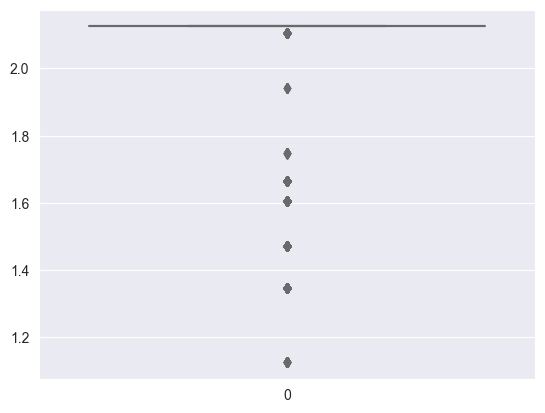

In [301]:
sns.boxplot(data=data["Type"])

***Handling outliers in 16th column***

In [303]:
print(data.columns[15])

Location


<Axes: >

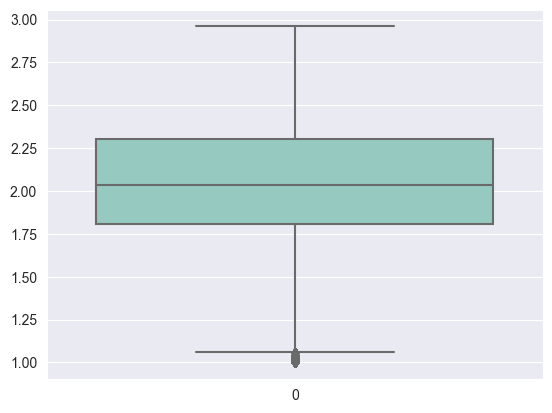

In [304]:
sns.boxplot(data=data["Location"])